In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset (assuming it is in the same location as the notebook)
dataset_original = pd.read_csv("1429_1.csv")
dataset_add_01 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
dataset_add_02 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

C:\Users\larry\AppData\Local\Temp\ipykernel_17816\2924004062.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_original = pd.read_csv("1429_1.csv")


In [2]:
# Display the shape of the dataset
print(f"Original Dataset shape: {dataset_original.shape}")
print(f"\nAdditional Dataset 01 shape: {dataset_add_01.shape}")
print(f"\nAdditional Dataset 02 shape: {dataset_add_02.shape}")

Original Dataset shape: (34660, 21)

Additional Dataset 01 shape: (5000, 24)

Additional Dataset 02 shape: (28332, 24)


In [3]:
# Display the first few rows of the dataset
print("First rows of the Original Dataset:")
print(dataset_original.head())

print("\nFirst rows of the Additional Dataset 01:")
print(dataset_add_01.head())

print("\nFirst rows of the Additional Dataset 02:")
print(dataset_add_02.head())

First rows of the Original Dataset:
                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                      

In [4]:
# Get general information about the dataset
print("\nOriginal Dataset information:")
print(dataset_original.info())

print("\nAdditional Dataset 01 information:")
print(dataset_add_01.info())

print("\nAdditional Dataset 02 information:")
print(dataset_add_02.info())


Original Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  f

In [5]:
# Display descriptive statistics for the dataset
print("\nOriginal Dataset Descriptive statistics:")
print(dataset_original.describe(include='all'))

print("\nAdditional Dataset 01 Descriptive statistics:")
print(dataset_add_01.describe(include='all'))

print("\nAdditional Dataset 02 Descriptive statistics:")
print(dataset_add_02.describe(include='all'))


Original Dataset Descriptive statistics:
                          id  \
count                  34660   
unique                    42   
top     AVphgVaX1cnluZ0-DR74   
freq                   10966   
mean                     NaN   
std                      NaN   
min                      NaN   
25%                      NaN   
50%                      NaN   
75%                      NaN   
max                      NaN   

                                                     name       asins   brand  \
count                                               27900       34658   34660   
unique                                                 48          41       6   
top     Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...  B018Y229OU  Amazon   
freq                                                10966       10966   28701   
mean                                                  NaN         NaN     NaN   
std                                                   NaN         NaN     NaN   
min   

In [6]:
# Display the column names in the dataset
print("\nOriginal Dataset Column names:")
print(dataset_original.columns)

print("\nAdditional Dataset 01 Column names:")
print(dataset_add_01.columns)

print("\nAdditional Dataset 02 Column names:")
print(dataset_add_02.columns)


Original Dataset Column names:
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

Additional Dataset 01 Column names:
Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

Additional Dataset 02 Column names:
Index(['id', 'dateAdded', 'dateUpdated', 

In [23]:
# Select critical columns and combine datasets
columns_required = ['reviews.text', 'reviews.rating']
dataset_combined = pd.concat([
    dataset_original[columns_required],
    dataset_add_01[columns_required],
    dataset_add_02[columns_required]
], ignore_index=True)

In [24]:
# Save balanced dataset
dataset_combined.to_csv("dataset_combined.csv", index=False)

In [25]:
# Display the shape of the dataset
print(f"Combined Dataset shape: {dataset_combined.shape}")

Combined Dataset shape: (67992, 2)


In [11]:
# Get general information about the dataset
print("\nCombined Dataset information:")
print(dataset_combined.info())


Combined Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67992 entries, 0 to 67991
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    67991 non-null  object 
 1   reviews.rating  67959 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB
None


In [12]:
# Check for missing values in the dataset
print("\nCombined Original Missing values by column:")
print(dataset_combined.isnull().sum())


Combined Original Missing values by column:
reviews.text       1
reviews.rating    33
dtype: int64


In [13]:
# Remove rows with missing values
print(f"Shape before removing missing values: {dataset_combined.shape}")
dataset_combined.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)
print(f"Shape after removing missing values: {dataset_combined.shape}")

# Verify no missing values remain
print("\nRemaining Missing Values by Column:")
print(dataset_combined.isnull().sum())


Shape before removing missing values: (67992, 2)
Shape after removing missing values: (67958, 2)

Remaining Missing Values by Column:
reviews.text      0
reviews.rating    0
dtype: int64


In [14]:
# Check for duplicate rows in the dataset
print("\nCombined Dataset Number of duplicate rows:")
print(dataset_combined.duplicated().sum())


Combined Dataset Number of duplicate rows:
20953


In [15]:
# Check and remove exact duplicate rows
print(f"\nNumber of exact duplicate rows: {dataset_combined.duplicated().sum()}")
dataset_combined.drop_duplicates(inplace=True)
print(f"Shape after removing exact duplicates: {dataset_combined.shape}")


Number of exact duplicate rows: 20953
Shape after removing exact duplicates: (47005, 2)


In [16]:
# Check for duplicate reviews.text with different ratings
duplicates_by_text = dataset_combined.duplicated(subset=['reviews.text'], keep=False)
duplicate_text_df = dataset_combined[duplicates_by_text]

print(f"\nNumber of duplicate `reviews.text` with potentially different `reviews.rating`: {duplicate_text_df.shape[0]}")


Number of duplicate `reviews.text` with potentially different `reviews.rating`: 251


In [19]:
# Inspect a sample of duplicates
print("\nSample of duplicate reviews.text with different ratings:")
print(duplicate_text_df.sort_values(by='reviews.text').head(20))


Sample of duplicate reviews.text with different ratings:
                         reviews.text  reviews.rating
43548                             AOK             4.0
40004                             AOK             5.0
50195                   As Advertised             4.0
40960                   As Advertised             5.0
40963                   As advertised             5.0
43550                   As advertised             4.0
43552                  As advertised.             4.0
40966                  As advertised.             5.0
40016                    As described             5.0
50216                    As described             4.0
40234                     As expected             4.0
40133                     As expected             5.0
40994                    As expected!             5.0
50256                    As expected!             4.0
40996                    As expected.             5.0
40021                    As expected.             3.0
41054                   

In [20]:
# Remove rows with duplicate `reviews.text` but different `reviews.rating`
print(f"\nShape before removing `reviews.text` duplicates with different `reviews.rating`: {dataset_combined.shape}")
dataset_combined = dataset_combined[~dataset_combined.duplicated(subset=['reviews.text'], keep=False)]
print(f"Shape after removing `reviews.text` duplicates with different `reviews.rating`: {dataset_combined.shape}")


Shape before removing `reviews.text` duplicates with different `reviews.rating`: (47005, 2)
Shape after removing `reviews.text` duplicates with different `reviews.rating`: (46754, 2)


In [22]:
# Get general information about the dataset
print("\nCombined Dataset information:")
print(dataset_combined.info())


Combined Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 46754 entries, 0 to 66790
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    46754 non-null  object 
 1   reviews.rating  46754 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB
None


In [23]:
print("\nFirst rows of the Combined Dataset:")
print(dataset_combined.head())


First rows of the Combined Dataset:
                                        reviews.text  reviews.rating
0  This product so far has not disappointed. My c...             5.0
1  great for beginner or experienced person. Boug...             5.0
2  Inexpensive tablet for him to use and learn on...             5.0
3  I've had my Fire HD 8 two weeks now and I love...             4.0
4  I bought this for my grand daughter when she c...             5.0



Distribution of ratings:
reviews.rating
5.0    32615
4.0    10251
3.0     2049
1.0     1068
2.0      771
Name: count, dtype: int64


C:\Users\larry\AppData\Local\Temp\ipykernel_5920\2428995998.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reviews.rating', data=dataset_combined, palette='viridis')


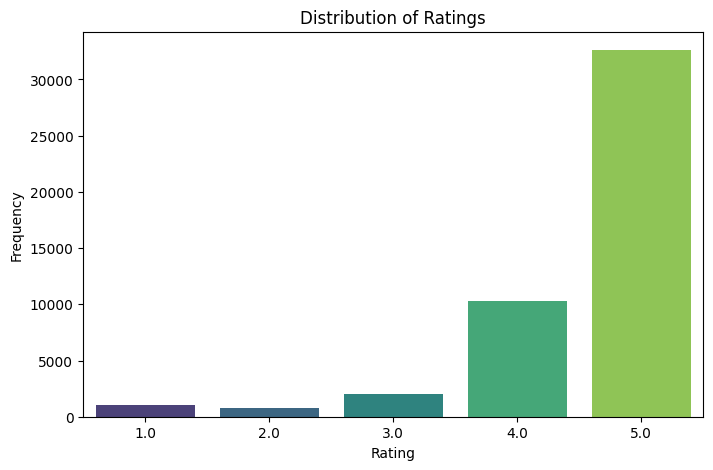

In [24]:
# Analyze the distribution of the 'rating' column if it exists
if 'reviews.rating' in dataset_combined.columns:
    print("\nDistribution of ratings:")
    print(dataset_combined['reviews.rating'].value_counts())
    
    # Plot the distribution of ratings
    plt.figure(figsize=(8, 5))
    sns.countplot(x='reviews.rating', data=dataset_combined, palette='viridis')
    plt.title("Distribution of Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()


In [25]:
# Define maximum number of records per rating
max_count = 1500  # Adjust as needed

# Balance dataset by limiting maximum records per rating
balanced_dataset = dataset_combined.groupby("reviews.rating").apply(
    lambda x: x.sample(n=min(len(x), max_count), random_state=42)
).reset_index(drop=True)

# Verify distribution
print("Balanced dataset distribution:\n", balanced_dataset["reviews.rating"].value_counts())

Balanced dataset distribution:
 reviews.rating
3.0    1500
5.0    1500
4.0    1500
1.0    1068
2.0     771
Name: count, dtype: int64


C:\Users\larry\AppData\Local\Temp\ipykernel_5920\1893867897.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_dataset = dataset_combined.groupby("reviews.rating").apply(


C:\Users\larry\AppData\Local\Temp\ipykernel_5920\3193593117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reviews.rating', data=balanced_dataset, palette='viridis')


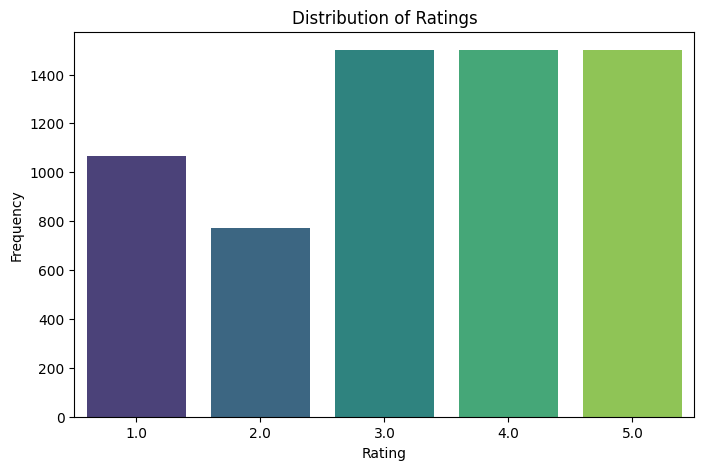

In [28]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='reviews.rating', data=balanced_dataset, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [29]:
# Save balanced dataset
balanced_dataset.to_csv("balanced_reviews.csv", index=False)

print("Balanced dataset saved. Shape:", balanced_dataset.shape)

Balanced dataset saved. Shape: (6339, 2)


# **Text Cleaning**

In [30]:
from nltk.corpus import stopwords
import nltk
import re
nltk.download('stopwords')# Download stopwords if not already downloaded
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\larry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Define a function for cleaning text including stopwords removal
def clean_text_sw(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Define a function for cleaning text no stopwords removal
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text

data_cleaned = balanced_dataset.copy()  # Make a copy of the balanced dataset
lstm_data_cleaned = balanced_dataset.copy()  # Make a copy of the balanced dataset

# Apply text cleaning to the reviews.text column
print("Performing basic text cleaning...")
data_cleaned['reviews.text'] = data_cleaned['reviews.text'].apply(clean_text_sw)
lstm_data_cleaned['reviews.text'] = lstm_data_cleaned['reviews.text'].apply(clean_text)

# Verify cleaned text
print("\nSample cleaned text for traditional models:")
print(data_cleaned['reviews.text'].head())

print("\nSample cleaned text for lstm model:")
print(lstm_data_cleaned['reviews.text'].head())

Performing basic text cleaning...

Sample cleaned text for traditional models:
0                       last near long brand batteries
1    version marketed children like dumbed cheap ve...
2    batteries die almost fast harbor freight free ...
3    first time buy first tablet came showed needed...
4           tore within one week baby blue shear green
Name: reviews.text, dtype: object

Sample cleaned text for lstm model:
0    do not last near as long as other off brand ba...
1    this   version should have been marketed to ch...
2    these batteries die almost as fast as harbor f...
3    the first time i buy my first tablet it came o...
4    tore within one week and is baby blue and very...
Name: reviews.text, dtype: object


In [34]:
# Save the cleaned dataset for reference
output_file_01 = "data_cleaned.csv"
data_cleaned.to_csv(output_file_01, index=False)
print(f"\nCleaned dataset for traditional models saved as '{output_file_01}'")

output_file_02 = "lstm_data_cleaned.csv"
lstm_data_cleaned.to_csv(output_file_02, index=False)
print(f"\nCleaned dataset for lstm model saved as '{output_file_02}'")


Cleaned dataset for traditional models saved as 'data_cleaned.csv'

Cleaned dataset for lstm model saved as 'lstm_data_cleaned.csv'


# **Adding Sentiment Feature**

In [36]:
# r1o1 ==> Balanced data, cleaned and sentiment added
# Create a new DataFrame with the selected features
r1o1_data = data_cleaned.copy()

# Add the 'sentiment' feature based on the mapping logic
def map_sentiment(rating):
    if rating in [1, 2]:
        return "negative"
    elif rating == 3:
        return "neutral"
    elif rating in [4, 5]:
        return "positive"

r1o1_data['sentiment'] = r1o1_data['reviews.rating'].apply(map_sentiment)

In [37]:
# Verify the new dataset
print("First rows of the new dataset r1o1:")
print(r1o1_data.head())

First rows of the new dataset r1o1:
                                        reviews.text  reviews.rating sentiment
0                     last near long brand batteries             1.0  negative
1  version marketed children like dumbed cheap ve...             1.0  negative
2  batteries die almost fast harbor freight free ...             1.0  negative
3  first time buy first tablet came showed needed...             1.0  negative
4         tore within one week baby blue shear green             1.0  negative


In [39]:
# r1o2 ==> Balanced data and cleaned Note: No sentiment added

r1o2_data = data_cleaned.copy()

In [40]:
# Check the shape of the new datasets
print(f"\nNew dataset r1o1 shape: {r1o1_data.shape}")
print(f"\nNew dataset r1o2 shape: {r1o2_data.shape}")


New dataset r1o1 shape: (6339, 3)

New dataset r1o2 shape: (6339, 2)


In [41]:
# Distribution of the 'sentiment' feature
print("\nDistribution of 'sentiment':")
print(r1o1_data['sentiment'].value_counts())


Distribution of 'sentiment':
sentiment
positive    3000
negative    1839
neutral     1500
Name: count, dtype: int64


In [42]:
# Save the datasets for r1o1 and r1o2
r1o1_data.to_csv("r1o1_dataset.csv", index=False)
print("Sentiment labels assigned and dataset saved for r1o1.")

r1o2_data.to_csv("r1o2_dataset.csv", index=False)
print("Dataset saved for r1o2.")

Sentiment labels assigned and dataset saved for r1o1.
Sentiment labels assigned and dataset saved for r1o2.


C:\Users\larry\AppData\Local\Temp\ipykernel_5920\1008258126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=r1o1_data, palette='pastel', order=["negative", "neutral", "positive"])


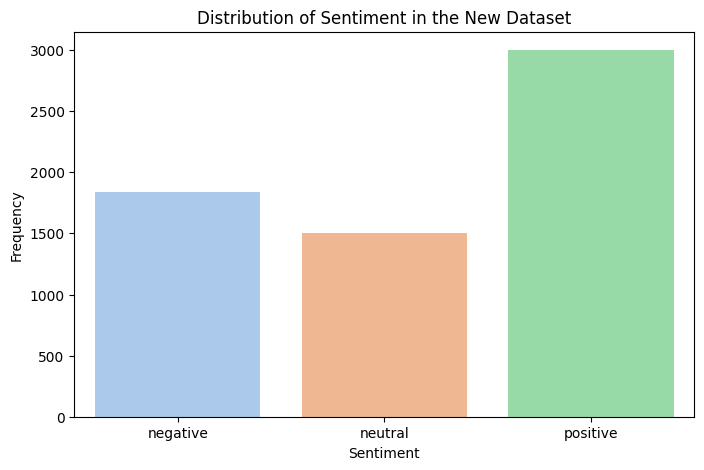

In [43]:
# Visualize the sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=r1o1_data, palette='pastel', order=["negative", "neutral", "positive"])
plt.title("Distribution of Sentiment in the New Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()


# **Splitting the Datasets into train, validation, and test sets.**

In [46]:
from sklearn.model_selection import train_test_split

# Function to split the dataset with sentiment into train, validation, and test sets
def split_dataset(dataset, stratify_col='sentiment'):
    # Split into train (70%) and temp (30%) for validation and test
    train, temp = train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset[stratify_col])
    # Further split temp into validation (15%) and test (15%)
    validation, test = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp[stratify_col])
    return train, validation, test

# Function to split the dataset without sentiment into train, validation, and test sets
def split_dataset_rating(dataset, stratify_col='reviews.rating'):
    # Split into train (70%) and temp (30%) for validation and test
    train, temp = train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset[stratify_col])
    # Further split temp into validation (15%) and test (15%)
    validation, test = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp[stratify_col])
    return train, validation, test

# Split the `r1o1_data`
print("Splitting `r1o1_data` into train, validation, and test sets...")
train_r1o1, val_r1o1, test_r1o1 = split_dataset(r1o1_data)
# Verify the sizes of the splits
print(f"Train, validation, and test sizes for `r1o1_data`: {train_r1o1.shape}, {val_r1o1.shape}, {test_r1o1.shape}")

# Split the `r1o2_data`
print("Splitting `r1o2_data` into train, validation, and test sets...")
train_r1o2, val_r1o2, test_r1o2 = split_dataset_rating(r1o2_data)
# Verify the sizes of the splits
print(f"Train, validation, and test sizes for `r1o2_data`: {train_r1o2.shape}, {val_r1o2.shape}, {test_r1o2.shape}")

Splitting `r1o1_data` into train, validation, and test sets...
Train, validation, and test sizes for `r1o1_data`: (4437, 3), (951, 3), (951, 3)
Splitting `r1o2_data` into train, validation, and test sets...
Train, validation, and test sizes for `r1o2_data`: (4437, 2), (951, 2), (951, 2)


In [47]:
# Save the splits for future use
train_r1o1.to_csv("train_r1o1.csv", index=False)
val_r1o1.to_csv("val_r1o1.csv", index=False)
test_r1o1.to_csv("test_r1o1.csv", index=False)

train_r1o2.to_csv("train_r1o2.csv", index=False)
val_r1o2.to_csv("val_r1o2.csv", index=False)
test_r1o2.to_csv("test_r1o2.csv", index=False)

print("\nDataset splits saved successfully!")


Dataset splits saved successfully!


In [2]:
# Load the spitted datasets (assuming it is in the same location as the notebook)
train_r1o1 = pd.read_csv("train_r1o1.csv")
val_r1o1 = pd.read_csv("val_r1o1.csv")
test_r1o1 = pd.read_csv("test_r1o1.csv")

train_r1o2 = pd.read_csv("train_r1o2.csv")
val_r1o2 = pd.read_csv("val_r1o2.csv")
test_r1o2 = pd.read_csv("test_r1o2.csv")

In [9]:
# Ensure all entries in 'reviews.text' are strings
train_r1o1['reviews.text'] = train_r1o1['reviews.text'].astype(str)

# Check if there are any unexpected data types after conversion
print("Data types after conversion:", train_r1o1['reviews.text'].apply(type).value_counts())

val_r1o1['reviews.text'] = val_r1o1['reviews.text'].astype(str)

# Check if there are any unexpected data types after conversion
print("Data types after conversion:", val_r1o1['reviews.text'].apply(type).value_counts())

test_r1o1['reviews.text'] = test_r1o1['reviews.text'].astype(str)

# Check if there are any unexpected data types after conversion
print("Data types after conversion:", test_r1o1['reviews.text'].apply(type).value_counts())

Data types after conversion: reviews.text
<class 'str'>    4437
Name: count, dtype: int64
Data types after conversion: reviews.text
<class 'str'>    951
Name: count, dtype: int64
Data types after conversion: reviews.text
<class 'str'>    951
Name: count, dtype: int64


In [10]:
# Ensure all entries in 'reviews.text' are strings
train_r1o2['reviews.text'] = train_r1o2['reviews.text'].astype(str)

# Check if there are any unexpected data types after conversion
print("Data types after conversion:", train_r1o2['reviews.text'].apply(type).value_counts())

val_r1o2['reviews.text'] = val_r1o2['reviews.text'].astype(str)

# Check if there are any unexpected data types after conversion
print("Data types after conversion:", val_r1o2['reviews.text'].apply(type).value_counts())

test_r1o2['reviews.text'] = test_r1o2['reviews.text'].astype(str)

# Check if there are any unexpected data types after conversion
print("Data types after conversion:", test_r1o2['reviews.text'].apply(type).value_counts())

Data types after conversion: reviews.text
<class 'str'>    4437
Name: count, dtype: int64
Data types after conversion: reviews.text
<class 'str'>    951
Name: count, dtype: int64
Data types after conversion: reviews.text
<class 'str'>    951
Name: count, dtype: int64


# **Tokenization and Lemmatization**

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\larry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\larry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\larry\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define tokenization and lemmatization function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]  # Lemmatize and remove non-alphanumeric
    return " ".join(lemmatized_tokens)

# Apply preprocessing to all splits and save results
def preprocess_dataset(dataset, text_column='reviews.text'):
    dataset[text_column] = dataset[text_column].apply(preprocess_text)
    return dataset

print("Tokenizing and lemmatizing `train_r1o1`...")
train_r1o1 = preprocess_dataset(train_r1o1)
val_r1o1 = preprocess_dataset(val_r1o1)
test_r1o1 = preprocess_dataset(test_r1o1)

print("Tokenizing and lemmatizing `train_r1o2`...")
train_r1o2 = preprocess_dataset(train_r1o2)
val_r1o2 = preprocess_dataset(val_r1o2)
test_r1o2 = preprocess_dataset(test_r1o2)

# Save preprocessed datasets for future use
train_r1o1.to_csv("preprocessed_comb_train_r1o1.csv", index=False)
val_r1o1.to_csv("preprocessed_comb_val_r1o1.csv", index=False)
test_r1o1.to_csv("preprocessed_comb_test_r1o1.csv", index=False)

train_r1o2.to_csv("preprocessed_comb_train_r1o2.csv", index=False)
val_r1o2.to_csv("preprocessed_comb_val_r1o2.csv", index=False)
test_r1o2.to_csv("preprocessed_comb_test_r1o2.csv", index=False)

print("\nPreprocessed datasets saved successfully!")

Tokenizing and lemmatizing `train_r1o1`...
Tokenizing and lemmatizing `train_r1o2`...

Preprocessed datasets saved successfully!


# **Vectorization applying TF-IDF**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

# Function to vectorize datasets
def vectorize_datasets(train, val, test, text_column='reviews.text'):
    # Fit TF-IDF on the training set
    X_train = tfidf_vectorizer.fit_transform(train[text_column])
    X_val = tfidf_vectorizer.transform(val[text_column])
    X_test = tfidf_vectorizer.transform(test[text_column])
    
    return X_train, X_val, X_test

print("Vectorizing `dataset_drop`...")
X_train_r1o1, X_val_r1o1, X_test_r1o1 = vectorize_datasets(train_r1o1, val_r1o1, test_r1o1)

print("Vectorizing `dataset_r1o2`...")
X_train_r1o2, X_val_r1o2, X_test_r1o2 = vectorize_datasets(train_r1o2, val_r1o2, test_r1o2)

Vectorizing `dataset_drop`...
Vectorizing `dataset_r1o2`...


In [14]:
# Save the vectorized features for future use (optional step)
import joblib
joblib.dump(tfidf_vectorizer, "comb_reduced_tfidf_vectorizer.pkl")
joblib.dump(X_train_r1o1, "X_comb_train_r1o1.pkl")
joblib.dump(X_val_r1o1, "X_comb_val_r1o1.pkl")
joblib.dump(X_test_r1o1, "X_comb_test_r1o1.pkl")

joblib.dump(X_train_r1o2, "X_comb_train_r1o2.pkl")
joblib.dump(X_val_r1o2, "X_comb_val_r1o2.pkl")
joblib.dump(X_test_r1o2, "X_comb_test_r1o2.pkl")

print("\nVectorized datasets saved successfully!")


Vectorized datasets saved successfully!


# **Models Training and Evaluation**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [16]:
# Encode sentiment labels into numeric format
encoder = LabelEncoder()
y_train_r1o1 = encoder.fit_transform(train_r1o1['sentiment'])
y_val_r1o1 = encoder.transform(val_r1o1['sentiment'])
y_test_r1o1 = encoder.transform(test_r1o1['sentiment'])

y_train_r1o2 = encoder.fit_transform(train_r1o2['reviews.rating'])
y_val_r1o2 = encoder.transform(val_r1o2['reviews.rating'])
y_test_r1o2 = encoder.transform(test_r1o2['reviews.rating'])

In [17]:
# Compute class weights for each dataset
class_weights_r1o1 = compute_class_weight(
    class_weight='balanced',  # Automatically calculate weights
    classes=np.unique(y_train_r1o1),  # Unique classes
    y=y_train_r1o1  # Target labels
)
class_weights_dict_r1o1 = dict(enumerate(class_weights_r1o1))

# Print class weights for `dataset_r1o1`
print("\nClass Weights for `dataset_r1o1` (encoded labels):")
for label, weight in class_weights_dict_r1o1.items():
    print(f"Class {encoder.inverse_transform([label])[0]}: Weight = {weight:.4f}")

class_weights_r1o2 = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_r1o2),
    y=y_train_r1o2
)
class_weights_dict_r1o2 = dict(enumerate(class_weights_r1o2))

# Print class weights for `dataset_r1o2`
print("\nClass Weights for `dataset_r1o2` (encoded labels):")
for label, weight in class_weights_dict_r1o2.items():
    print(f"Class {encoder.inverse_transform([label])[0]}: Weight = {weight:.4f}")


Class Weights for `dataset_r1o1` (encoded labels):
Class 1.0: Weight = 1.1492
Class 2.0: Weight = 1.4086
Class 3.0: Weight = 0.7043

Class Weights for `dataset_r1o2` (encoded labels):
Class 1.0: Weight = 1.1880
Class 2.0: Weight = 1.6433
Class 3.0: Weight = 0.8451
Class 4.0: Weight = 0.8451
Class 5.0: Weight = 0.8451


In [19]:
# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name, target_names):
    print(f"\n--- Training and Evaluating {model_name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validation predictions
    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_precision = precision_score(y_val, val_predictions, average='macro')
    val_recall = recall_score(y_val, val_predictions, average='macro')
    val_f1 = f1_score(y_val, val_predictions, average='macro')
    
    # Test predictions
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='macro')
    test_recall = recall_score(y_test, test_predictions, average='macro')
    test_f1 = f1_score(y_test, test_predictions, average='macro')
    
    # Print evaluation metrics
    print(f"\nValidation Metrics ({model_name}):")
    print(f"  Accuracy: {val_accuracy:.4f}")
    print(f"  Precision: {val_precision:.4f}")
    print(f"  Recall: {val_recall:.4f}")
    print(f"  F1-Score: {val_f1:.4f}")
    
    print(f"\nTest Metrics ({model_name}):")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-Score: {test_f1:.4f}")
    
    # Classification report and confusion matrix
    print(f"\nClassification Report ({model_name} - Test Set):\n")
    print(classification_report(y_test, test_predictions, target_names=target_names))
    
    print(f"\nConfusion Matrix ({model_name} - Test Set):\n")
    print(confusion_matrix(y_test, test_predictions))

# Define class names for `r1o1` and `r1o2`
target_names_r1o1 = ["negative", "neutral", "positive"]
target_names_r1o2 = ["1.0", "2.0", "3.0", "4.0", "5.0"]

# Prepare models
logistic_model_r1o1 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight=class_weights_dict_r1o1, max_iter=1000, random_state=42)
svm_model_r1o1 = SVC(C=1, gamma='scale', kernel='rbf', class_weight='balanced', probability=True)  # SVM uses balanced weights automatically
random_forest_model_r1o1 = RandomForestClassifier( n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', bootstrap=True, class_weight=class_weights_dict_r1o1, random_state=42)

# Train and evaluate on `dataset_r1o1`
print("\nEvaluating on `dataset_r1o1`...")
train_evaluate_model(logistic_model_r1o1, X_train_r1o1, y_train_r1o1, X_val_r1o1, y_val_r1o1, X_test_r1o1, y_test_r1o1, "Logistic Regression", target_names_r1o1)
train_evaluate_model(svm_model_r1o1, X_train_r1o1, y_train_r1o1, X_val_r1o1, y_val_r1o1, X_test_r1o1, y_test_r1o1, "SVM", target_names_r1o1)
train_evaluate_model(random_forest_model_r1o1, X_train_r1o1, y_train_r1o1, X_val_r1o1, y_val_r1o1, X_test_r1o1, y_test_r1o1, "Random Forest", target_names_r1o1)

# Repeat the same for `dataset_r1o2`
logistic_model_r1o2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight=class_weights_dict_r1o2, max_iter=1000, random_state=42)
svm_model_r1o2 = SVC(C=1, gamma='scale', kernel='rbf', class_weight='balanced', probability=True)
random_forest_model_r1o2 = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', bootstrap=True, class_weight=class_weights_dict_r1o2, random_state=42)

print("\nEvaluating on `dataset_r1o2`...")
train_evaluate_model(logistic_model_r1o2, X_train_r1o2, y_train_r1o2, X_val_r1o2, y_val_r1o2, X_test_r1o2, y_test_r1o2, "Logistic Regression", target_names_r1o2)
train_evaluate_model(svm_model_r1o2, X_train_r1o2, y_train_r1o2, X_val_r1o2, y_val_r1o2, X_test_r1o2, y_test_r1o2, "SVM", target_names_r1o2)
train_evaluate_model(random_forest_model_r1o2, X_train_r1o2, y_train_r1o2, X_val_r1o2, y_val_r1o2, X_test_r1o2, y_test_r1o2, "Random Forest", target_names_r1o2)


Evaluating on `dataset_r1o1`...

--- Training and Evaluating Logistic Regression ---

Validation Metrics (Logistic Regression):
  Accuracy: 0.6793
  Precision: 0.6374
  Recall: 0.6331
  F1-Score: 0.6319

Test Metrics (Logistic Regression):
  Accuracy: 0.6898
  Precision: 0.6466
  Recall: 0.6426
  F1-Score: 0.6419

Classification Report (Logistic Regression - Test Set):

              precision    recall  f1-score   support

    negative       0.69      0.72      0.70       276
     neutral       0.49      0.38      0.43       225
    positive       0.76      0.82      0.79       450

    accuracy                           0.69       951
   macro avg       0.65      0.64      0.64       951
weighted avg       0.68      0.69      0.68       951


Confusion Matrix (Logistic Regression - Test Set):

[[199  48  29]
 [ 54  86  85]
 [ 37  42 371]]

--- Training and Evaluating SVM ---

Validation Metrics (SVM):
  Accuracy: 0.6866
  Precision: 0.6500
  Recall: 0.6487
  F1-Score: 0.6485

Test M

# **XGBoost Classifier using tunned hyperparammeters and Sample Weights**


Evaluating XGBoost on `dataset_r1o1` with sample weights...

--- Training and Evaluating XGBoost (dataset_r1o1) ---


c:\Users\larry\anaconda3\envs\projectnlp\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:51:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Metrics (XGBoost (dataset_r1o1)):
  Accuracy: 0.6435
  Precision: 0.6048
  Recall: 0.6044
  F1-Score: 0.6044

Test Metrics (XGBoost (dataset_r1o1)):
  Accuracy: 0.6719
  Precision: 0.6344
  Recall: 0.6372
  F1-Score: 0.6355

Classification Report (XGBoost (dataset_r1o1) - Test Set):

              precision    recall  f1-score   support

    negative       0.68      0.71      0.69       276
     neutral       0.45      0.43      0.44       225
    positive       0.78      0.77      0.77       450

    accuracy                           0.67       951
   macro avg       0.63      0.64      0.64       951
weighted avg       0.67      0.67      0.67       951


Confusion Matrix (XGBoost (dataset_r1o1) - Test Set):

[[197  51  28]
 [ 57  97  71]
 [ 37  68 345]]


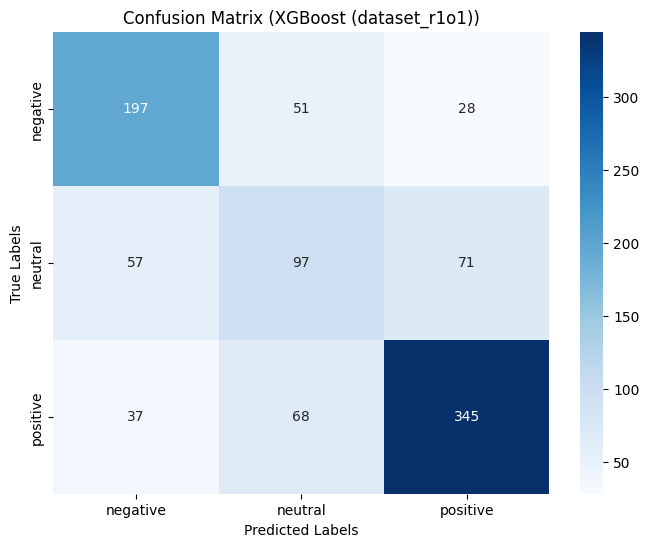


Evaluating XGBoost on `dataset_r1o2` with sample weights...

--- Training and Evaluating XGBoost (dataset_r1o2) ---


c:\Users\larry\anaconda3\envs\projectnlp\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:52:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Metrics (XGBoost (dataset_r1o2)):
  Accuracy: 0.4458
  Precision: 0.4317
  Recall: 0.4342
  F1-Score: 0.4326

Test Metrics (XGBoost (dataset_r1o2)):
  Accuracy: 0.4269
  Precision: 0.4102
  Recall: 0.4142
  F1-Score: 0.4118

Classification Report (XGBoost (dataset_r1o2) - Test Set):

              precision    recall  f1-score   support

         1.0       0.55      0.58      0.56       161
         2.0       0.23      0.21      0.22       115
         3.0       0.40      0.38      0.39       225
         4.0       0.38      0.36      0.37       225
         5.0       0.50      0.54      0.52       225

    accuracy                           0.43       951
   macro avg       0.41      0.41      0.41       951
weighted avg       0.42      0.43      0.42       951


Confusion Matrix (XGBoost (dataset_r1o2) - Test Set):

[[ 93  28  21  10   9]
 [ 30  24  34  14  13]
 [ 23  33  86  49  34]
 [ 10   9  58  82  66]
 [ 13  11  17  63 121]]


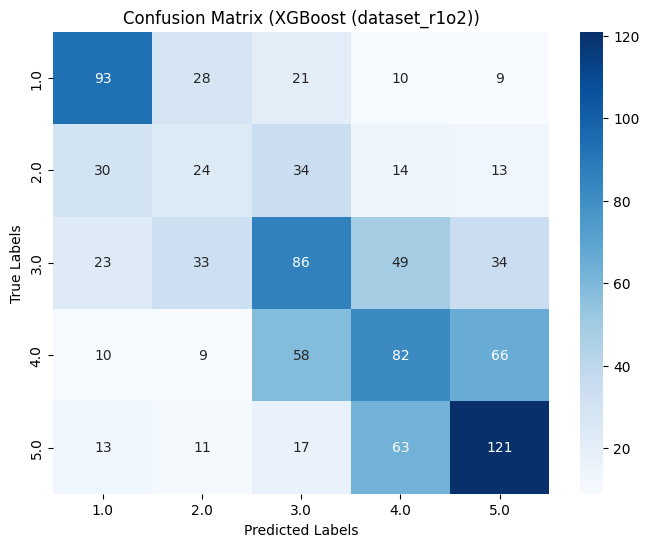

In [21]:
# Updated XGBoost models with sample weights for all classes
def train_evaluate_xgboost_with_weights(X_train, y_train, X_val, y_val, X_test, y_test, sample_weights, model_name, encoder, target_names):
    print(f"\n--- Training and Evaluating {model_name} ---")
    
    xgb_model = XGBClassifier(
        colsample_bytree=0.8,
        learning_rate=0.2,
        max_depth=7,
        n_estimators=200,
        subsample=0.8,
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )
    
    # Train the model with sample weights
    xgb_model.fit(X_train, y_train, sample_weight=sample_weights)
    
    # Validation predictions
    val_predictions = xgb_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_precision = precision_score(y_val, val_predictions, average='macro')
    val_recall = recall_score(y_val, val_predictions, average='macro')
    val_f1 = f1_score(y_val, val_predictions, average='macro')
    
    # Test predictions
    test_predictions = xgb_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='macro')
    test_recall = recall_score(y_test, test_predictions, average='macro')
    test_f1 = f1_score(y_test, test_predictions, average='macro')
    
    # Print evaluation metrics
    print(f"\nValidation Metrics ({model_name}):")
    print(f"  Accuracy: {val_accuracy:.4f}")
    print(f"  Precision: {val_precision:.4f}")
    print(f"  Recall: {val_recall:.4f}")
    print(f"  F1-Score: {val_f1:.4f}")
    
    print(f"\nTest Metrics ({model_name}):")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-Score: {test_f1:.4f}")
    
    # Classification report and confusion matrix
    print(f"\nClassification Report ({model_name} - Test Set):\n")
    print(classification_report(y_test, test_predictions, target_names=target_names))
    
    print(f"\nConfusion Matrix ({model_name} - Test Set):\n")
    conf_matrix = confusion_matrix(y_test, test_predictions)
    print(conf_matrix)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()

# Define class names for `r1o1` and `r1o2`
target_names_r1o1 = ["negative", "neutral", "positive"]
target_names_r1o2 = ["1.0", "2.0", "3.0", "4.0", "5.0"]

# Prepare sample weights for datasets
sample_weights_r1o1 = np.array([1.1492 if label == 0 else 1.4086 if label == 1 else 0.7043 for label in y_train_r1o1])
sample_weights_r1o2 = np.array([1.1880 if label == 0 else 1.6433 if label == 1 else 0.8451 if label == 2 else 0.8451 if label == 3 else 0.8451 for label in y_train_r1o2])

# Train and evaluate on `dataset_r1o1`
print("\nEvaluating XGBoost on `dataset_r1o1` with sample weights...")
train_evaluate_xgboost_with_weights(
    X_train_r1o1, y_train_r1o1, X_val_r1o1, y_val_r1o1, X_test_r1o1, y_test_r1o1, 
    sample_weights_r1o1, "XGBoost (dataset_r1o1)", encoder, target_names_r1o1
)

# Train and evaluate on `dataset_r1o2`
print("\nEvaluating XGBoost on `dataset_r1o2` with sample weights...")
train_evaluate_xgboost_with_weights(
    X_train_r1o2, y_train_r1o2, X_val_r1o2, y_val_r1o2, X_test_r1o2, y_test_r1o2, 
    sample_weights_r1o2, "XGBoost (dataset_r1o2)", encoder, target_names_r1o2
)

# **RandomForrest Classifier using tunned hyperparammeters and Class Weights**

In [ ]:
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute class weights and encode labels
def compute_class_weights_and_encode(y_train, encoder):
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weights_dict = {label: weight for label, weight in zip(np.unique(y_train), class_weights)}
    return class_weights_dict

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    print(f"\n--- Training and Evaluating {model_name} ---")

    # Train the model
    model.fit(X_train, y_train)

    # Validation predictions
    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_precision = precision_score(y_val, val_predictions, average='macro')
    val_recall = recall_score(y_val, val_predictions, average='macro')
    val_f1 = f1_score(y_val, val_predictions, average='macro')

    # Test predictions
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='macro')
    test_recall = recall_score(y_test, test_predictions, average='macro')
    test_f1 = f1_score(y_test, test_predictions, average='macro')

    # Print evaluation metrics
    print(f"\nValidation Metrics ({model_name}):")
    print(f"  Accuracy: {val_accuracy:.4f}")
    print(f"  Precision: {val_precision:.4f}")
    print(f"  Recall: {val_recall:.4f}")
    print(f"  F1-Score: {val_f1:.4f}")

    print(f"\nTest Metrics ({model_name}):")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-Score: {test_f1:.4f}")

    # Classification report and confusion matrix
    print(f"\nClassification Report ({model_name} - Test Set):\n")
    print(classification_report(y_test, test_predictions, target_names=encoder.classes_))

    print(f"\nConfusion Matrix ({model_name} - Test Set):\n")
    conf_matrix = confusion_matrix(y_test, test_predictions)
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()

# Prepare models
rf_model_drop = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=False,
    class_weight=class_weights_dict_drop,
    random_state=42
)

rf_model_recode = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=False,
    class_weight=class_weights_dict_recode,
    random_state=42
)

# Train and evaluate Random Forest on dataset_drop
print("\nEvaluating on `dataset_drop`...")
train_evaluate_model(rf_model_drop, X_train_drop, y_train_drop, X_val_drop, y_val_drop, X_test_drop, y_test_drop, "Random Forest (dataset_drop)")

# Train and evaluate Random Forest on dataset_recode
print("\nEvaluating on `dataset_recode`...")
train_evaluate_model(rf_model_recode, X_train_recode, y_train_recode, X_val_recode, y_val_recode, X_test_recode, y_test_recode, "Random Forest (dataset_recode)")

In [ ]:
'''# Function to compute sample weights
def compute_sample_weights(y_train, class_weights_dict):
    return np.array([class_weights_dict[label] for label in y_train])

# Compute sample weights for each dataset
sample_weights_drop = compute_sample_weights(y_train_drop, class_weights_dict_drop)
sample_weights_recode = compute_sample_weights(y_train_recode, class_weights_dict_recode)'''

# Updated XGBoost Models without `scale_pos_weight`
xgb_model_drop = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model_recode = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train and evaluate XGBoost on `dataset_drop` with sample weights
print("\nEvaluating on `dataset_drop`...")
xgb_model_drop.fit(X_train_drop, y_train_drop, sample_weight=sample_weights_drop)
train_evaluate_model(xgb_model_drop, X_train_drop, y_train_drop, X_val_drop, y_val_drop, X_test_drop, y_test_drop, "XGBoost (dataset_drop)")

# Train and evaluate XGBoost on `dataset_recode` with sample weights
print("\nEvaluating on `dataset_recode`...")
xgb_model_recode.fit(X_train_recode, y_train_recode, sample_weight=sample_weights_recode)
train_evaluate_model(xgb_model_recode, X_train_recode, y_train_recode, X_val_recode, y_val_recode, X_test_recode, y_test_recode, "XGBoost (dataset_recode)")

In [ ]:

# Function to perform GridSearchCV for XGBoost

def grid_search_xgboost(X_train, y_train, X_val, y_val, dataset_name):
    print(f"\n--- Starting Grid Search for XGBoost on {dataset_name} ---")

    param_grid_xgb = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    xgb_model = XGBClassifier(
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )

    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid_xgb,
        scoring='f1_macro',
        cv=5,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    print(f"Best Parameters for XGBoost ({dataset_name}):", best_params)
    best_model = grid_search.best_estimator_

    # Evaluate on validation set
    val_predictions = best_model.predict(X_val)
    val_f1_score = f1_score(y_val, val_predictions, average='macro')
    print(f"Validation F1 Macro Score (XGBoost - {dataset_name}):", val_f1_score)

    return best_model, best_params

# Perform Grid Search for SVM and XGBoost on dataset_drop
print("\nEvaluating `dataset_drop`...")
svm_best_model_drop, svm_best_params_drop = grid_search_svm(X_train_drop, y_train_drop, X_val_drop, y_val_drop, "dataset_drop")
xgb_best_model_drop, xgb_best_params_drop = grid_search_xgboost(X_train_drop, y_train_drop, X_val_drop, y_val_drop, "dataset_drop")

# Perform Grid Search for SVM and XGBoost on dataset_recode
print("\nEvaluating `dataset_recode`...")
svm_best_model_recode, svm_best_params_recode = grid_search_svm(X_train_recode, y_train_recode, X_val_recode, y_val_recode, "dataset_recode")
xgb_best_model_recode, xgb_best_params_recode = grid_search_xgboost(X_train_recode, y_train_recode, X_val_recode, y_val_recode, "dataset_recode")

# **Generate Embedding**
*To calculate vectors representations and us it for dataset reduction by selecting the most diverse and representative rows by rating*

In [26]:
# Load the combined dataset (assuming it is in the same location as the notebook)
dataset_combined = pd.read_csv("dataset_combined.csv")

*Pre-Cleaning process*

In [27]:
# Remove rows with missing values
print(f"Shape before removing missing values: {dataset_combined.shape}")
dataset_combined.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)
print(f"Shape after removing missing values: {dataset_combined.shape}")

# Verify no missing values remain
print("\nRemaining Missing Values by Column:")
print(dataset_combined.isnull().sum())

# Check and remove exact duplicate rows
print(f"\nNumber of exact duplicate rows: {dataset_combined.duplicated().sum()}")
dataset_combined.drop_duplicates(inplace=True)
print(f"Shape after removing exact duplicates: {dataset_combined.shape}")

# Remove rows with duplicate `reviews.text` but different `reviews.rating`
print(f"\nShape before removing `reviews.text` duplicates with different `reviews.rating`: {dataset_combined.shape}")
dataset_combined = dataset_combined[~dataset_combined.duplicated(subset=['reviews.text'], keep=False)]
print(f"Shape after removing `reviews.text` duplicates with different `reviews.rating`: {dataset_combined.shape}")

Shape before removing missing values: (67992, 2)
Shape after removing missing values: (67958, 2)

Remaining Missing Values by Column:
reviews.text      0
reviews.rating    0
dtype: int64

Number of exact duplicate rows: 20953
Shape after removing exact duplicates: (47005, 2)

Shape before removing `reviews.text` duplicates with different `reviews.rating`: (47005, 2)
Shape after removing `reviews.text` duplicates with different `reviews.rating`: (46754, 2)


In [28]:
data_combo_preclean = dataset_combined.copy()
# Save balanced dataset
data_combo_preclean.to_csv("data_combo_preclean.csv", index=False)

In [29]:
print(f"Shape after performing all necessary pre-cleaning: {data_combo_preclean.shape}")

Shape after performing all necessary pre-cleaning: (46754, 2)


*Embedding process*

In [33]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained GloVe embeddings
def load_glove_embeddings(filepath):
    print("Loading GloVe embeddings...")
    embedding_index = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs
    print(f"Loaded {len(embedding_index)} word vectors.")
    return embedding_index

# Example: Provide the path to your GloVe file
glove_path = "glove.6B.100d.txt"  # Update this
embedding_index = load_glove_embeddings(glove_path)

# Generate sentence embeddings
def get_sentence_embedding(sentence, embedding_index, embedding_dim=100):
    words = sentence.split()  # Split the sentence into words
    word_vectors = [embedding_index[word] for word in words if word in embedding_index]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)  # Average of word vectors
    else:
        return np.zeros(embedding_dim)  # Return a zero vector if no words match

# Apply to the dataset data_combo_preclean
data_combo_preclean["embedding"] = data_combo_preclean["reviews.text"].apply(
    lambda x: get_sentence_embedding(x, embedding_index)
)

print("Embeddings generated for all texts.")

Loading GloVe embeddings...
Loaded 400000 word vectors.
Embeddings generated for all texts.


In [35]:
# Function to reduce dataset based on diversity of embeddings
def reduce_dataset_based_on_embeddings(dataset, max_rows_per_rating):
    reduced_data = []
    for rating, group in dataset.groupby("reviews.rating"):
        # Extract embeddings for the current group
        embeddings = np.vstack(group["embedding"].to_numpy())
        
        # Calculate pairwise cosine similarity
        similarity_matrix = cosine_similarity(embeddings)
        diversity_scores = 1 - similarity_matrix.mean(axis=1)  # Higher = more diverse
        
        # Select top rows based on diversity scores
        group["diversity_score"] = diversity_scores
        selected_rows = group.nlargest(max_rows_per_rating, "diversity_score")
        
        reduced_data.append(selected_rows)
    
    return pd.concat(reduced_data, ignore_index=True)

# Reduce dataset to 1500 rows per rating
data_combo_reduced = reduce_dataset_based_on_embeddings(data_combo_preclean, max_rows_per_rating=1500)

print("Dataset reduced to 1500 rows per rating.")


Dataset reduced to 1500 rows per rating.


In [36]:
print(data_combo_reduced.shape)
print(data_combo_reduced.head())

(6339, 4)
                                        reviews.text  reviews.rating  \
0                                          Dangerous             1.0   
1  WHAT A HORRENDOUS PRODUCT. I THOUGHT THAT BEIN...             1.0   
2  ABSOLUTELY THE WORST BATTERIES IVE EVER USED A...             1.0   
3                                        Don't last!             1.0   
4                      NOT MUCH POWER IN THESE BATTS             1.0   

                                           embedding  diversity_score  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...              1.0  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...              1.0  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...              1.0  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...              1.0  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...              1.0  


In [37]:
# Drop embeddings column for saving
data_combo_reduced.drop(columns=["embedding", "diversity_score"], inplace=True)

# Save the reduced dataset
data_combo_reduced.to_csv("data_combo_reduced.csv", index=False)

print("Reduced dataset saved to 'data_combo_reduced.csv'.")

Reduced dataset saved to 'data_combo_reduced.csv'.


In [38]:
print(f"Shape after performing reduction based on embeddings: {data_combo_reduced.shape}")

Shape after performing reduction based on embeddings: (6339, 2)


# **Text Cleaning**

In [39]:
from nltk.corpus import stopwords
import nltk
import re
nltk.download('stopwords')# Download stopwords if not already downloaded
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\larry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Load the reduced dataset
data_combo_reduced = pd.read_csv("data_combo_reduced.csv")

# Define a function for cleaning text including stopwords removal
def clean_text_sw(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Define a function for cleaning text no stopwords removal
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text

data_r2o1_fullclean = data_combo_reduced.copy()  # Make a copy of the balanced dataset
data_r2o1_partialclean = data_combo_reduced.copy()  # Make a copy of the balanced dataset

# Apply text cleaning to the reviews.text column
print("Performing basic text cleaning...")
data_r2o1_fullclean['reviews.text'] = data_r2o1_fullclean['reviews.text'].apply(clean_text_sw)
data_r2o1_partialclean['reviews.text'] = data_r2o1_partialclean['reviews.text'].apply(clean_text)

# Verify cleaned text
print("\nSample fully cleaned text for traditional models:")
print(data_r2o1_fullclean['reviews.text'].head())

print("\nSample partial cleaned text (stopwords not removed) for lstm & transformers models:")
print(data_r2o1_partialclean['reviews.text'].head())

Performing basic text cleaning...

Sample fully cleaned text for traditional models:
0                                            dangerous
1    horrendous product thought amazon would good w...
2    absolutely worst batteries ive ever used amazo...
3                                            dont last
4                                     much power batts
Name: reviews.text, dtype: object

Sample partial cleaned text (stopwords not removed) for lstm & transformers models:
0                                            dangerous
1    what a horrendous product i thought that being...
2    absolutely the worst batteries ive ever used a...
3                                            dont last
4                        not much power in these batts
Name: reviews.text, dtype: object


In [41]:
# Save the cleaned dataset for reference
output_file_03 = "data_r2o1_fullclean.csv"
data_r2o1_fullclean.to_csv(output_file_03, index=False)
print(f"\nCleaned dataset for traditional models saved as '{output_file_03}'")

output_file_04 = "data_r2o1_partialclean.csv"
data_r2o1_partialclean.to_csv(output_file_04, index=False)
print(f"\nCleaned dataset for lstm & transformers models saved as '{output_file_04}'")


Cleaned dataset for traditional models saved as 'data_r2o1_fullclean.csv'

Cleaned dataset for lstm & transformers models saved as 'data_r2o1_partialclean.csv'


# **Adding Sentiment Feature**

In [46]:
# Step 1: Add sentiment column to the dataset

def add_sentiment_column(data):
    """Adds a sentiment column based on the rating."""
    def map_sentiment(rating):
        if rating in [1, 2]:
            return "negative"
        elif rating == 3:
            return "neutral"
        elif rating in [4, 5]:
            return "positive"

    data["sentiment"] = data["reviews.rating"].apply(map_sentiment)
    return data

# Load the clean dataset for traditional models
data_r2o1_fullclean = pd.read_csv("data_r2o1_fullclean.csv")
data_r2o1_fullclean = add_sentiment_column(data_r2o1_fullclean)


In [47]:
# Ensure all entries in 'reviews.text' are strings
data_r2o1_fullclean['reviews.text'] = data_r2o1_fullclean['reviews.text'].astype(str)

# Check if there are any unexpected data types after conversion
print("Data types after conversion:", data_r2o1_fullclean['reviews.text'].apply(type).value_counts())

Data types after conversion: reviews.text
<class 'str'>    6339
Name: count, dtype: int64


In [48]:
# Save the dataset with the sentiment column
output_file_with_sentiment = "data_r2o1_fullclean_with_sentiment.csv"
data_r2o1_fullclean.to_csv(output_file_with_sentiment, index=False)
print(f"Dataset with sentiment column saved as '{output_file_with_sentiment}'")

Dataset with sentiment column saved as 'data_r2o1_fullclean_with_sentiment.csv'


In [49]:
print(data_r2o1_fullclean.shape)
print(data_r2o1_fullclean.head())

(6339, 3)
                                        reviews.text  reviews.rating sentiment
0                                          dangerous             1.0  negative
1  horrendous product thought amazon would good w...             1.0  negative
2  absolutely worst batteries ive ever used amazo...             1.0  negative
3                                          dont last             1.0  negative
4                                   much power batts             1.0  negative



# **Splitting the Datasets into train and test sets.**

In [50]:
# Step 2: Split the dataset
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80-20 split)
data_r2o1_train, data_r2o1_test = train_test_split(data_r2o1_fullclean, test_size=0.2, random_state=42)

# Save split datasets
data_r2o1_train_file = "data_r2o1_train.csv"
data_r2o1_test_file = "data_r2o1_test.csv"
data_r2o1_train.to_csv(data_r2o1_train_file, index=False)
data_r2o1_test.to_csv(data_r2o1_test_file, index=False)
print(f"Training dataset saved as '{data_r2o1_train_file}'")
print(f"Test dataset saved as '{data_r2o1_test_file}'")

Training dataset saved as 'data_r2o1_train.csv'
Test dataset saved as 'data_r2o1_test.csv'


In [4]:
# Load the (assuming it is in the same location as the notebook)
data_r2o1_train = pd.read_csv("data_r2o1_train.csv")
data_r2o1_test = pd.read_csv("data_r2o1_test.csv")

In [5]:
print(data_r2o1_train.shape)
print(data_r2o1_train.head())

print(data_r2o1_test.shape)
print(data_r2o1_test.head())

(5071, 3)
                                        reviews.text  reviews.rating sentiment
0                   good quality happy thanks amazon             5.0  positive
1                   dont hold charge like top brands             1.0  negative
2     itäôsadvertisement everything scree itäô cheap             2.0  negative
3  months slow started good getting slower cleare...             3.0   neutral
4        enjoy listening music asking research items             4.0  positive
(1268, 3)
                                        reviews.text  reviews.rating sentiment
0  horrible batteries far every battery used hasn...             1.0  negative
1                   size ok value wife love use time             5.0  positive
2                                good price delivery             5.0  positive
3                                     good buy hands             5.0  positive
4                                         good price             5.0  positive


# **Tokenization and Lemmatization**

In [6]:
# Step 3: Tokenize and lemmatize the dataset
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\larry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\larry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    return " ".join(lemmatized_tokens)

data_r2o1_train["reviews.text"] = data_r2o1_train["reviews.text"].apply(preprocess_text)
data_r2o1_test["reviews.text"] = data_r2o1_test["reviews.text"].apply(preprocess_text)

AttributeError: 'float' object has no attribute 'lower'

In [54]:
# Save the tokenized and lemmatized datasets
tokenized_train_file = "data_r2o1_train_tokenized.csv"
tokenized_test_file = "data_r2o1_test_tokenized.csv"
data_r2o1_train.to_csv(tokenized_train_file, index=False)
data_r2o1_test.to_csv(tokenized_test_file, index=False)
print(f"Tokenized and lemmatized training dataset saved as '{tokenized_train_file}'")
print(f"Tokenized and lemmatized test dataset saved as '{tokenized_test_file}'")

Tokenized and lemmatized training dataset saved as 'data_r2o1_train_tokenized.csv'
Tokenized and lemmatized test dataset saved as 'data_r2o1_test_tokenized.csv'


# **Vectorization applying TF-IDF**

In [2]:
# Load the tokenized datasets (assuming it is in the same location as the notebook)
data_r2o1_train = pd.read_csv("data_r2o1_train_tokenized.csv")
data_r2o1_test = pd.read_csv("data_r2o1_test_tokenized.csv")

In [3]:
# Step 4: Vectorize the dataset
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(data_r2o1_train["reviews.text"])
X_test = vectorizer.transform(data_r2o1_test["reviews.text"])
y_train = data_r2o1_train["sentiment"]
y_test = data_r2o1_test["sentiment"]

ValueError: np.nan is an invalid document, expected byte or unicode string.

# **XGBooost Classifier Model Training, Evaluation, and Stored**

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [58]:
# Encode the sentiment labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(data_r2o1_train["sentiment"])
y_test = label_encoder.transform(data_r2o1_test["sentiment"])

# Save the label encoder for future use
label_encoder_file = "label_encoder_r2o1.pkl"
joblib.dump(label_encoder, label_encoder_file)
print(f"LabelEncoder saved as '{label_encoder_file}'")


LabelEncoder saved as 'label_encoder_r2o1.pkl'


In [59]:
# Compute class weights for each dataset
class_weights_r2o1 = compute_class_weight(
    class_weight='balanced',  # Automatically calculate weights
    classes=np.unique(y_train),  # Unique classes
    y=y_train  # Target labels
)
class_weights_dict_r2o1 = dict(enumerate(class_weights_r2o1))

# Print class weights for `dataset_r2o1`
print("\nClass Weights for `dataset_r2o1` (encoded labels):")
for label, weight in class_weights_dict_r2o1.items():
    print(f"Class {encoder.inverse_transform([label])[0]}: Weight = {weight:.4f}")


Class Weights for `dataset_r2o1` (encoded labels):
Class 1.0: Weight = 1.1666
Class 2.0: Weight = 1.3981
Class 3.0: Weight = 0.7005



Evaluating XGBoost on `dataset_r2o1` with sample weights...

--- Training and Evaluating XGBoost Model r2o1 ---
Class Names: ['0', '1', '2']


c:\Users\larry\anaconda3\envs\projectnlp\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:07:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Trained model saved as 'xgboost_model_r2o1.pkl'

Test Metrics (XGBoost Model r2o1):
  Accuracy: 0.7279
  Precision: 0.7005
  Recall: 0.6923
  F1-Score: 0.6946

Classification Report (XGBoost Model r2o1 - Test Set):

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       390
           1       0.51      0.55      0.53       291
           2       0.81      0.85      0.83       587

    accuracy                           0.73      1268
   macro avg       0.70      0.69      0.69      1268
weighted avg       0.73      0.73      0.73      1268


Confusion Matrix (XGBoost Model r2o1 - Test Set):

[[264  78  48]
 [ 62 160  69]
 [ 11  77 499]]


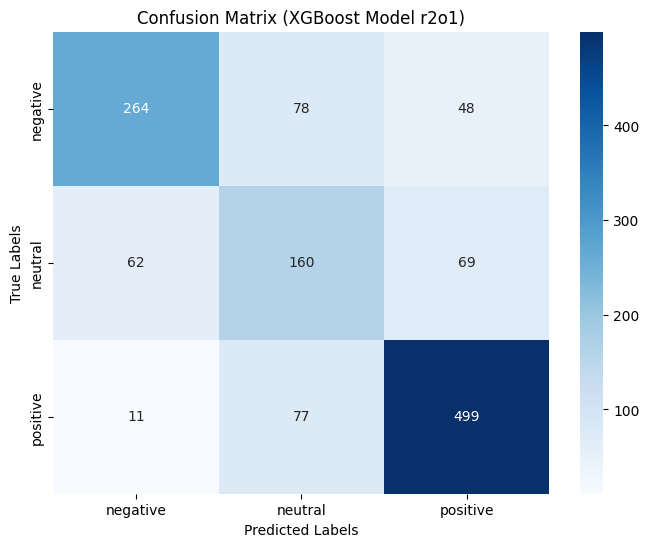

In [104]:
import joblib

# Updated XGBoost models with sample weights for all classes
def train_evaluate_xgboost_with_weights(X_train, y_train, X_test, y_test, sample_weights, model_name, encoder):
    print(f"\n--- Training and Evaluating {model_name} ---")
    
    # Convert encoder classes to a list of strings
    class_names = [str(label) for label in encoder.classes_]
    print(f"Class Names: {class_names}")

    xgb_model = XGBClassifier(
        colsample_bytree=0.6,
        learning_rate=0.03,
        max_depth=5,
        n_estimators=1000,
        subsample=0.7,
        min_child_weight=5,
        gamma=0.1,
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )
    
    # Train the model with sample weights
    xgb_model.fit(X_train, y_train, sample_weight=sample_weights)

    # Save the trained model immediately
    model_file = f"{model_name.replace(' ', '_').lower()}.pkl"
    joblib.dump(xgb_model, model_file)
    print(f"Trained model saved as '{model_file}'")
         
    # Test predictions
    test_predictions = xgb_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='macro')
    test_recall = recall_score(y_test, test_predictions, average='macro')
    test_f1 = f1_score(y_test, test_predictions, average='macro')
    
    # Print evaluation metrics
        
    print(f"\nTest Metrics ({model_name}):")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-Score: {test_f1:.4f}")
    
    # Classification report and confusion matrix
    print(f"\nClassification Report ({model_name} - Test Set):\n")
    print(classification_report(y_test, test_predictions, target_names=class_names))
    
    print(f"\nConfusion Matrix ({model_name} - Test Set):\n")
    conf_matrix = confusion_matrix(y_test, test_predictions)
    print(conf_matrix)
    
    class_names = ['negative', 'neutral', 'positive']  # Update this based on your encoder mapping

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()
    return model_file

# Reinitialize and fit LabelEncoder for the new dataset
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Debugging: Ensure encoded labels and classes are correct
'''print("Encoded Classes:", encoder.classes_)
print("Encoded y_train (unique):", np.unique(y_train_encoded))
print("Encoded y_test (unique):", np.unique(y_test_encoded))'''

# Prepare sample weights for datasets
sample_weights_r2o1 = np.array([1.5 if label == 0 else 2.0 if label == 1 else 1.0 for label in y_train_encoded]) # [1.1666 if label == 0 else 1.3981 if label == 1 else 0.7005 for label in y_train_encoded]

# Train and evaluate on `dataset_r2o1`
print("\nEvaluating XGBoost on `dataset_r2o1` with sample weights...")
model_file_path = train_evaluate_xgboost_with_weights(
    X_train, y_train_encoded, X_test, y_test_encoded, 
    sample_weights_r2o1, "XGBoost Model r2o1", encoder
)

In [105]:
# Load the saved model
loaded_model = joblib.load(model_file_path)

# Confirm loaded model
print(f"Model loaded from '{model_file_path}':")
print(loaded_model)

# Optional: Print loaded model's hyperparameters
print("\nHyperparameters of loaded model:")
print(loaded_model.get_params())

Model loaded from 'xgboost_model_r2o1.pkl':
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Hyperparameters of loaded model:
{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree

# **RandomForrest Classifier using tunned hyperparammeters and Class Weights**


Evaluating on `dataset_r2o1`...

--- Training and Evaluating Random Forest Model r2o1 ---
Class Names: ['0', '1', '2']
Trained model saved as 'random_forest_model_r2o1.pkl'

Test Metrics (Random Forest Model r2o1):
  Accuracy: 0.7374
  Precision: 0.7158
  Recall: 0.6945
  F1-Score: 0.7005

Classification Report (Random Forest Model r2o1 - Test Set):

              precision    recall  f1-score   support

           0       0.81      0.64      0.72       390
           1       0.56      0.55      0.55       291
           2       0.78      0.90      0.83       587

    accuracy                           0.74      1268
   macro avg       0.72      0.69      0.70      1268
weighted avg       0.74      0.74      0.73      1268


Confusion Matrix (Random Forest Model r2o1 - Test Set):

[[250  73  67]
 [ 51 159  81]
 [  8  53 526]]


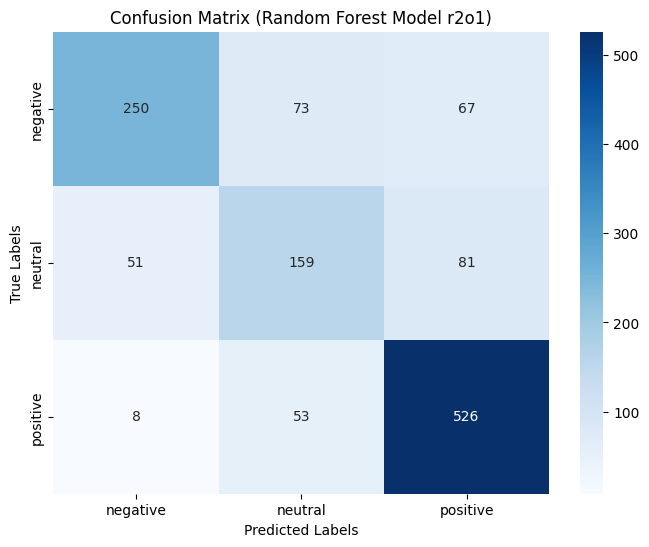

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n--- Training and Evaluating {model_name} ---")
    
    # Convert encoder classes to a list of strings
    class_names = [str(label) for label in encoder.classes_]
    print(f"Class Names: {class_names}")

    # Train the model
    model.fit(X_train, y_train)

    # Save the trained model immediately
    model_rf_file = f"{model_name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, model_rf_file)
    print(f"Trained model saved as '{model_rf_file}'")

    # Test predictions
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='macro')
    test_recall = recall_score(y_test, test_predictions, average='macro')
    test_f1 = f1_score(y_test, test_predictions, average='macro')

    print(f"\nTest Metrics ({model_name}):")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-Score: {test_f1:.4f}")

    # Classification report and confusion matrix
    print(f"\nClassification Report ({model_name} - Test Set):\n")
    print(classification_report(y_test, test_predictions, target_names=class_names))

    print(f"\nConfusion Matrix ({model_name} - Test Set):\n")
    conf_matrix = confusion_matrix(y_test, test_predictions)
    print(conf_matrix)

    class_names = ['negative', 'neutral', 'positive']  # Update this based on your encoder mapping

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()
    return model_rf_file

# Reinitialize and fit LabelEncoder for the new dataset
encoder = LabelEncoder()
y_train_rf_encoded = encoder.fit_transform(y_train)
y_test_rf_encoded = encoder.transform(y_test)

# Prepare models
rf_model_r2o1 = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    #max_features='sqrt',
    bootstrap=False,
    class_weight={0: 1.5, 1: 2.0, 2: 1.0}, #class_weights_dict_r2o1
    random_state=42
)

# Train and evaluate Random Forest on dataset_r2o1
print("\nEvaluating on `dataset_r2o1`...")
model_rf_file_path = train_evaluate_model(rf_model_r2o1, X_train, y_train_rf_encoded, X_test, y_test_rf_encoded, "Random Forest Model r2o1")

In [152]:
# Load the saved model
loaded_model = joblib.load(model_rf_file_path)

# Confirm loaded model
print(f"Model loaded from '{model_rf_file_path}':")
print(loaded_model)

# Optional: Print loaded model's hyperparameters
print("\nHyperparameters of loaded model:")
print(loaded_model.get_params())

Model loaded from 'random_forest_model_r2o1.pkl':
RandomForestClassifier(class_weight={0: 1.5, 1: 2.0, 2: 1.0}, max_depth=20,
                       min_samples_leaf=2, min_samples_split=30,
                       n_estimators=500, random_state=42)

Hyperparameters of loaded model:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {0: 1.5, 1: 2.0, 2: 1.0}, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 30, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


# Prepare models
rf_model_r2o1 = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=30,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    class_weight={0: 1.5, 1: 2.0, 2: 1.0}, #class_weights_dict_r2o1
    random_state=42
)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best F1 Score: 0.9931117563745216